# Preliminary analysis and data optimization

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import bs4
from bs4 import BeautifulSoup
import scipy as sc

import requests

import re

In [45]:
himovies_df=pd.read_csv('data\ALL_RAW_DATA.csv')
himovies_df

,movie_name,release_year,imdb_grades,genres,casts,duration in min,country,production
0,Operation Mincemeat,2022-04-01,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128.0,"UnitedKingdom,UnitedStatesofAmerica","ArcheryPictures,AFilmLocationCompany,CohenMedi..."
1,Memory,2022-04-28,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114.0,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF..."
2,Stanleyville,2021-08-15,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88.0,Canada,"ScythiaFilms,Anthropoid"
3,Scarborough,2021-09-10,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136.0,Canada,"CompyFilms,levelFILM"
4,Pride Jewel,2022-05-02,NaN,"Action,Thriller","JakeVincent,SarkisBakalyan,GeorgeBoudoures,Aya...",96.0,UnitedStatesofAmerica,"AppliedArtProductions,PointupFilms"
...,...,...,...,...,...,...,...,...
34919,The Shooting,1966-06-02,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78.0,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions"
34920,The Con Artists,2014-12-24,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116.0,SouthKorea,LotteEntertainment
34921,And There Were 4,2018-05-26,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83.0,NaN,NaN
34922,From Time to Time,2009-01-01,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95.0,UnitedKingdom,"LionheadStudios,EalingStudios"


## Handling  duplicate data

In [46]:
himovies_df.duplicated(subset='movie_name').sum()

1791

In [47]:
himovies_df=himovies_df.drop_duplicates(subset='movie_name')
himovies_df

,movie_name,release_year,imdb_grades,genres,casts,duration in min,country,production
0,Operation Mincemeat,2022-04-01,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128.0,"UnitedKingdom,UnitedStatesofAmerica","ArcheryPictures,AFilmLocationCompany,CohenMedi..."
1,Memory,2022-04-28,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114.0,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF..."
2,Stanleyville,2021-08-15,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88.0,Canada,"ScythiaFilms,Anthropoid"
3,Scarborough,2021-09-10,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136.0,Canada,"CompyFilms,levelFILM"
4,Pride Jewel,2022-05-02,NaN,"Action,Thriller","JakeVincent,SarkisBakalyan,GeorgeBoudoures,Aya...",96.0,UnitedStatesofAmerica,"AppliedArtProductions,PointupFilms"
...,...,...,...,...,...,...,...,...
34919,The Shooting,1966-06-02,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78.0,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions"
34920,The Con Artists,2014-12-24,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116.0,SouthKorea,LotteEntertainment
34921,And There Were 4,2018-05-26,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83.0,NaN,NaN
34922,From Time to Time,2009-01-01,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95.0,UnitedKingdom,"LionheadStudios,EalingStudios"


## Handling missing data:

In [48]:
himovies_df.shape

(33133, 8)

In [49]:
himovies_df.isnull().sum()

movie_name            0
release_year          1
imdb_grades         621
genres             1528
casts              1780
duration in min    1764
country            5055
production         6858
dtype: int64

In [50]:
himovies_df=himovies_df.dropna(axis=0,thresh=len(himovies_df.columns)-2)

In [51]:
himovies_df=himovies_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [52]:
himovies_df['duration in min'].value_counts()

90.0     1981
95.0      913
100.0     911
85.0      898
84.0      823
         ... 
284.0       1
217.0       1
540.0       1
200.0       1
235.0       1
Name: duration in min, Length: 256, dtype: int64

In [53]:
himovies_df['genres'].value_counts()

Drama                                     2861
Comedy                                    1950
Documentary                               1305
Horror                                    1235
Comedy,Drama                               687
                                          ... 
Drama,History,Documentary                    1
Drama,Thriller,Documentary                   1
Drama,Romance,History,Comedy                 1
ScienceFiction,Adventure,Comedy,Horror       1
Drama,Family,Fantasy,ScienceFiction          1
Name: genres, Length: 4195, dtype: int64

In [54]:
for col in himovies_df.columns:
    if col == "imdb_grades":
        continue
    elif col == 'casts' or col =='production':
        himovies_df[col].fillna('XXX',inplace= True)
    else:
        himovies_df[col].fillna(himovies_df[col].mode()[0],inplace= True)

In [55]:
himovies_df.isnull().sum()

movie_name           0
release_year         0
imdb_grades        309
genres               0
casts                0
duration in min      0
country              0
production           0
dtype: int64

In [56]:
himovies_df['duration in min'] = himovies_df['duration in min'].astype(int)

In [57]:
from datetime import datetime

for idx,row in enumerate (himovies_df["release_year"]):
    if row == '0000-00-00':
        himovies_df.drop([idx], axis=0, inplace=True)
        continue
#     if type(row) == float:
#         row=int(row)
#         continue
        
    datem = datetime.strptime(row, '%Y-%m-%d')
    row=datem.year
    #print(row)
    #print(type(row))
    himovies_df['release_year'].at[idx] = row

# date=himovies_df["release_year"][0]
# datem = datetime.strptime(date, '%Y-%m-%d')
# print(datem.year) 
# print(type(datem.year))

### We are currently leaving the rows containing nan in the "imdb_grades" column, later on we will use them for machine testing / prediction.

## Handling outliers data

In [58]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
#warnings.filterwarnings("ignore")

In [59]:
himovies_df['imdb_grades'].describe()

count    30542.000000
mean         5.882601
std          1.300330
min          1.100000
25%          5.100000
50%          6.100000
75%          6.800000
max          9.300000
Name: imdb_grades, dtype: float64

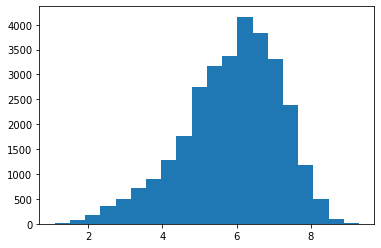

In [60]:
plt.hist(himovies_df.imdb_grades, bins=20)
plt.xlabel=("imdb_grades")
plt.ylabel=("Frequency")

### We can see that the rating is in the correct range between 1 and 10 so there are no exceptions in this column.

Text(0, 0.5, 'Frequency')

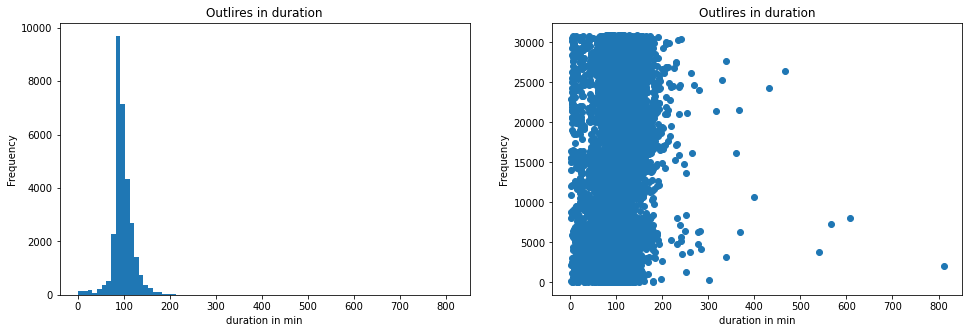

In [61]:
fig = plt.figure(figsize=(25, 5))
fig1 = fig.add_subplot(1,3,1)
fig2=fig.add_subplot(1,3,2)

fig1.hist(himovies_df['duration in min'],bins=80)
fig1.set_title('Outlires in duration')
fig1.set_xlabel("duration in min")
fig1.set_ylabel("Frequency")

x=[i for i in himovies_df['duration in min'].index]

fig2.scatter(himovies_df['duration in min'],x)
fig2.set_title('Outlires in duration')
fig2.set_xlabel("duration in min")
fig2.set_ylabel("Frequency")


In [62]:
himovies_df['duration in min'].describe()

count    30851.000000
mean        97.917863
std         23.592095
min          1.000000
25%         87.000000
50%         95.000000
75%        108.000000
max        811.000000
Name: duration in min, dtype: float64

### In the histograma graph we can't see clearly the outliers. However, in the scatter plot graph and the describe function we can see that there are movies with very short duration like (1 min) in one side, and on the other hand there are movies with very long duration such as (811 min) which indicates that there are a outliers.

In [63]:
sum(himovies_df['duration in min']>=180)

170

In [64]:
sum(himovies_df['duration in min']<=60)

1028

In [65]:
himovies_df=himovies_df[himovies_df['duration in min']<=180]

In [66]:
himovies_df=himovies_df[himovies_df['duration in min']>=60]

In [67]:
himovies_df['duration in min'].describe()

count    29787.000000
mean        99.224897
std         17.727617
min         60.000000
25%         88.000000
50%         95.000000
75%        108.000000
max        180.000000
Name: duration in min, dtype: float64

### We chose a standard length of movies that is between one to three hours, after an online check that indicate this information. And so we filtered out the outliers movies.

Text(0, 0.5, 'Frequency')

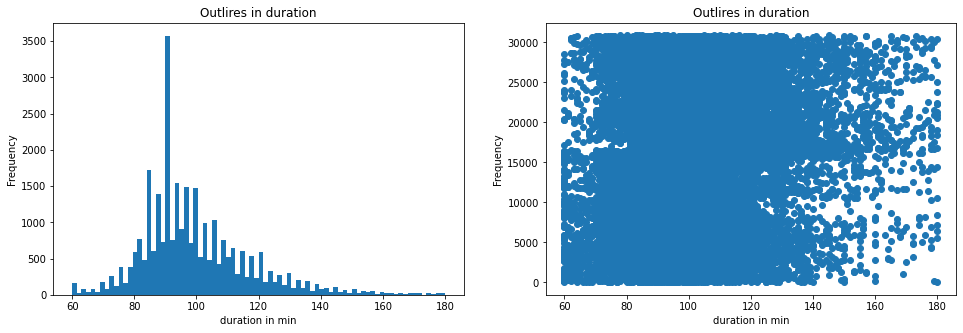

In [68]:
fig = plt.figure(figsize=(25, 5))
fig1 = fig.add_subplot(1,3,1)
fig2=fig.add_subplot(1,3,2)

fig1.hist(himovies_df['duration in min'],bins=80)
fig1.set_title('Outlires in duration')
fig1.set_xlabel("duration in min")
fig1.set_ylabel("Frequency")

x=[i for i in himovies_df['duration in min'].index]

fig2.scatter(himovies_df['duration in min'],x)
fig2.set_title('Outlires in duration')
fig2.set_xlabel("duration in min")
fig2.set_ylabel("Frequency")


## We saw that there are films with details of main and secondary countries and we decided to take the main. 

In [69]:
for idx,row in enumerate (himovies_df['country']):
    
    pattern = "\w+"
    
    x = re.search(pattern,row)[0]

    himovies_df['country'].at[idx]=x

In [70]:
country_filter=himovies_df['country'].value_counts().loc[lambda x: x<2].to_frame()
l=country_filter.T.columns
for i in l:
    idx=himovies_df[himovies_df['country']==i].index[0]
    himovies_df.drop([idx], axis=0, inplace=True)

In [71]:
himovies_df=himovies_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

## Now we will remove from the data frame the films that contain NaN in the column of the IMDB grade, we will keep them aside in another data frame and later we will make a prediction on them to check the quality of the prediction

In [72]:
movies_to_predict=himovies_df[himovies_df['imdb_grades'].isna()]

In [73]:
himovies_df=himovies_df.dropna(axis=0,subset=['imdb_grades'])

In [74]:
#movies_to_predict.to_csv(r'C:\Users\almog\Downloads\‏‏תיקיה חדשה (3)\data science project python\data\movies_to_predict.csv', index=False)
movies_to_predict.to_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\movies_to_predict.csv', index=False)

In [75]:
#himovies_df.to_csv(r'C:\Users\almog\Downloads\‏‏תיקיה חדשה (3)\data science project python\data\Clean_df.csv', index=False)
himovies_df.to_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\Clean_df.csv', index=False)